<a href="https://colab.research.google.com/github/krlnggrn/EVERY-DAY-MUST-CODING-7/blob/main/dicoding_ML_Karlina_Anggraeni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
import zipfile, os
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2022-07-07 13:24:12--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 404 The specified resource does not exist.
2022-07-07 13:24:13 ERROR 404: The specified resource does not exist..



In [4]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/EVERYDAY MUST CODING/Dicoding/rockpaperscissors.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
#split folder into train (60%) and validation (40%)
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 'tmp/rockpaperscissors/result', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3688.84 files/s]


In [6]:
#define folder loc
base_dir = 'tmp/rockpaperscissors/result'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

#show folder
os.listdir('tmp/rockpaperscissors/result/train')
os.listdir('tmp/rockpaperscissors/result/val')

['paper', 'scissors', 'rock']

In [7]:
#make directory of training data
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissor = os.path.join(train_dir, 'scissors')

#make directory of validation data
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissor = os.path.join(validation_dir, 'scissors')

In [8]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  fill_mode='nearest')

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
history = model.fit(train_generator,
                    steps_per_epoch=20,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=5,
                    verbose=1)

Epoch 1/20
20/20 [==============================] - 41s 2s/step - loss: 1.1156 - accuracy: 0.3922 - val_loss: 0.8684 - val_accuracy: 0.6438
Epoch 2/20
20/20 [==============================] - 36s 2s/step - loss: 0.7929 - accuracy: 0.6625 - val_loss: 0.5838 - val_accuracy: 0.7750
Epoch 3/20
20/20 [==============================] - 36s 2s/step - loss: 0.4899 - accuracy: 0.8344 - val_loss: 0.3574 - val_accuracy: 0.8750
Epoch 4/20
20/20 [==============================] - 36s 2s/step - loss: 0.3297 - accuracy: 0.8828 - val_loss: 0.2110 - val_accuracy: 0.9375
Epoch 5/20
20/20 [==============================] - 37s 2s/step - loss: 0.3250 - accuracy: 0.8906 - val_loss: 0.2394 - val_accuracy: 0.9250
Epoch 6/20
20/20 [==============================] - 36s 2s/step - loss: 0.2391 - accuracy: 0.9125 - val_loss: 0.2651 - val_accuracy: 0.8938
Epoch 7/20
20/20 [==============================] - 35s 2s/step - loss: 0.1821 - accuracy: 0.9312 - val_loss: 0.1927 - val_accuracy: 0.9187
Epoch 8/20
20/20 [==

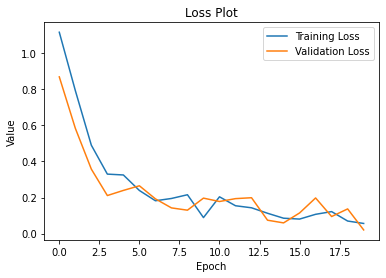

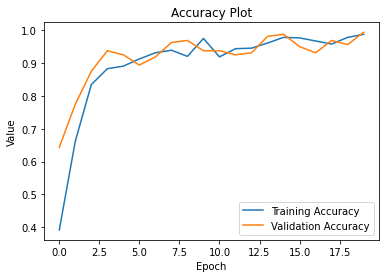

In [18]:
#training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

#training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Saving the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpeg to the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpeg
the-palm-of-your-hand-finger-hand-let-rock-paper-scissors.jpeg
paper


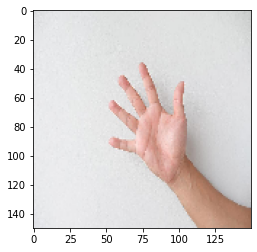

In [21]:
#Test Data
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')